In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (20, 10)

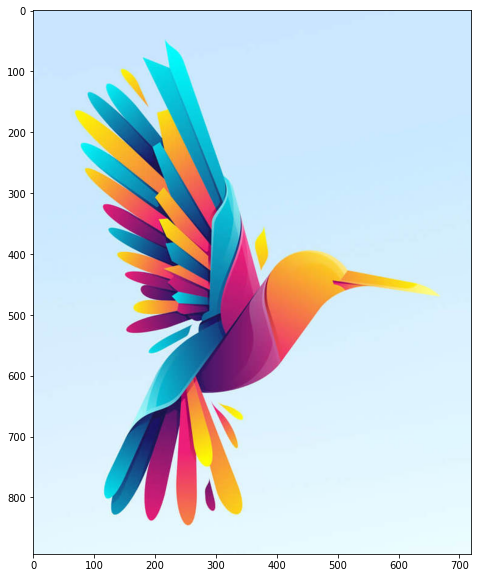

In [2]:
img = cv2.cvtColor(cv2.imread('image.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(893, 720, 3)

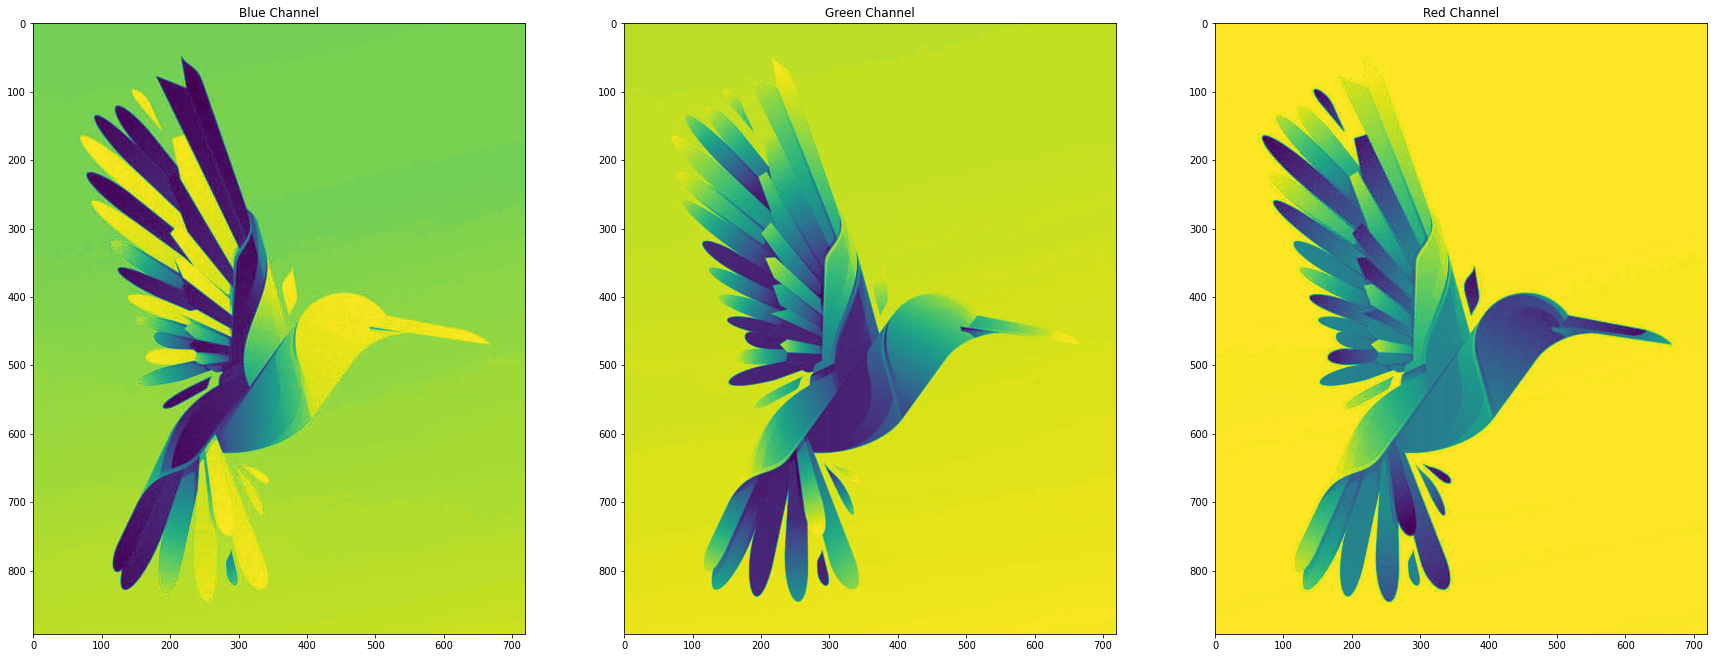

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the channels
fig = plt.figure(figsize = (30, 14.4))

#Blue Channel
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

#Green Channel
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

#Red Channel
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [5]:
#Creating data frames of blue green and red. Divided by 255 because we are gonna have values between 0 and 1

df_blue = blue/255
df_green = green/255
df_red = red/255

In [6]:
#Here is where all the magic happens.
#Here, we are gonna be reducing that image with dimension of something x 720, into something x 100

pca_b = PCA(n_components=100)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=100)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=100)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [7]:
#Here, we will be checking what ratio of data the pca has preserved

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

#Around 99% is a really good variance!

Blue Channel : 0.9963426575377915
Green Channel: 0.9962268396883898
Red Channel  : 0.994299239276821


In [8]:
#Now we are gonna transform the array into something x 720, so that we can display the image
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(893, 720) (893, 720) (893, 720)


In [9]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(893, 720, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


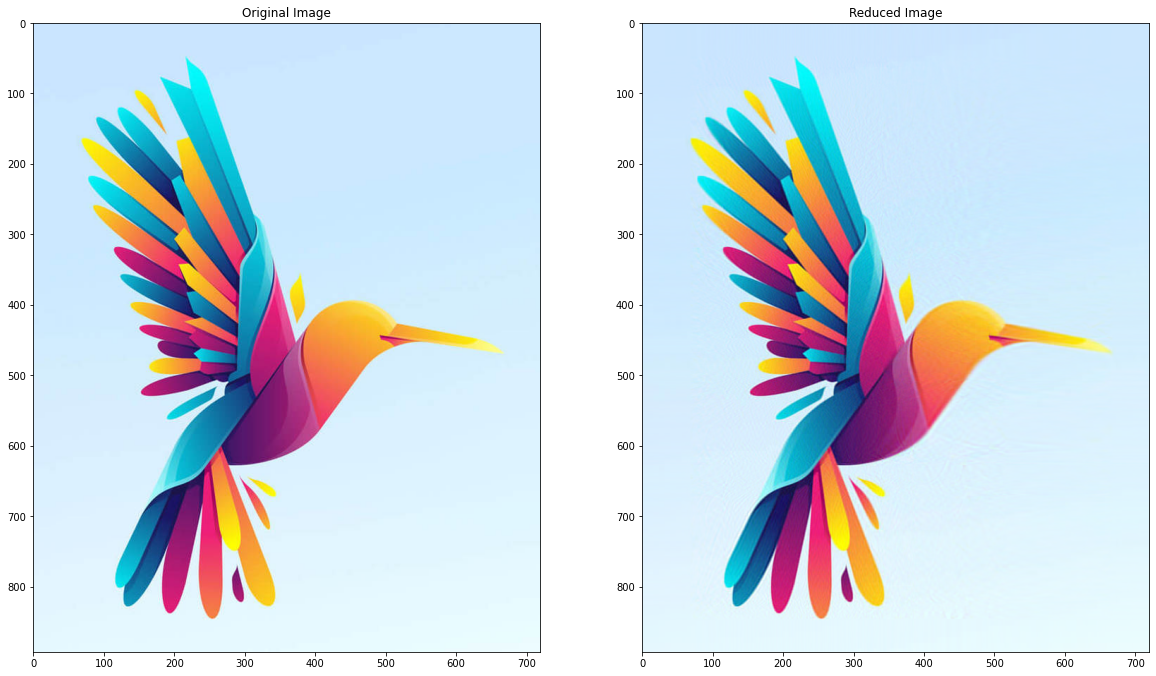

In [10]:
fig = plt.figure(figsize = (20, 14.4))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


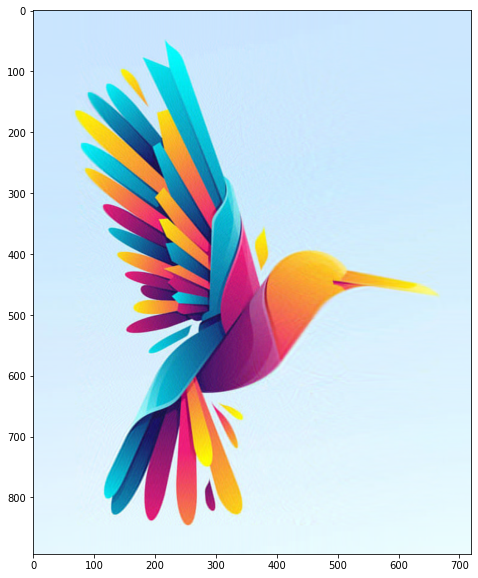

In [20]:
plt.imshow(img_reduced)
plt.savefig('out.jpg')